In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys 

project_dir_path = '/home/onoue/ws/lukasiewicz_1'
project_dir_path = '/Users/keisukeonoue/ws/lukasiewicz_1'
sys.path.append(project_dir_path)

import cvxpy as cp 
import numpy as np 
import pandas as pd 

from src.setup_problem_dual import Setup
# from src.setup_problem_dual import ObjectiveFunction
# from src.setup_problem_dual import Predicate_dual

from src.objective_function import ObjectiveFunction
from src.predicate import Predicate_dual

In [3]:
data_dir_path = "./../inputs/toy_data"

file_names_dict = {
    'supervised': ['L_p1.csv', 'L_p2.csv', 'L_p3.csv'],
    'unsupervised': ['U.csv'],
    'rule': ['rules.txt']
}

problem_instance = Setup(data_dir_path, file_names_dict, ObjectiveFunction, c1=10, c2=10)
objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

load_data took 0.0052678585052490234 seconds!
load_rules took 0.019114017486572266 seconds!
formulate_predicates_with_cvxpy took 0.00023818016052246094 seconds!
_construct_P took 0.020236968994140625 seconds!
construct_constraints took 0.013143062591552734 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jan 06 01:27:13 PM: Your problem has 96 variables, 135 constraints, and 0 parameters.
(CVXPY) Jan 06 01:27:13 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 06 01:27:13 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 06 01:27:13 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation           

# 切片 $b_j$ の値の調整ができていない気がする 

In [4]:
p1 = Predicate_dual(problem_instance, 'p1')
X = problem_instance.L['p1'][:, :-1]
Y = problem_instance.L['p1'][:, -1]
for x, y in zip(X, Y):
    print(x, y, p1(x))

[0.1 0.5] -1.0 -0.17495136176200843
[0.4 0.4] -1.0 -0.14998736025385795
[0.3 0.8] 1.0 0.5750137019089594
[0.9 0.7] 1.0 0.8249387220158664


In [5]:
p2 = Predicate_dual(problem_instance, 'p2')
X = problem_instance.L['p2'][:, :-1]
Y = problem_instance.L['p2'][:, -1]
for x, y in zip(X, Y):
    print(x, y, p2(x))

[0.1 0.3] -1.0 -0.2722826730423211
[0.6 0.4] -1.0 0.04464961915089127
[0.2 0.8] 1.0 0.7276330538914293
[0.7 0.6] 1.0 0.4592345532751967


In [6]:
p3 = Predicate_dual(problem_instance, 'p3')
X = problem_instance.L['p3'][:, :-1]
Y = problem_instance.L['p3'][:, -1]
for x, y in zip(X, Y):
    print(x, y, p3(x))

[0.4 0.2] -1.0 5.523270156737592e-05
[0.9 0.3] -1.0 0.19983622227773856
[0.2 0.6] 1.0 0.8001209696041776
[0.5 0.7] 1.0 0.9999875754165168


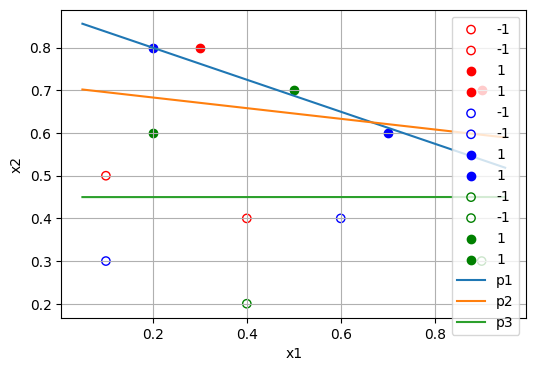

In [7]:
import matplotlib.pyplot as plt 


plt.figure(figsize=(6,4))

p1 = Predicate_dual(problem_instance, 'p1')
p2 = Predicate_dual(problem_instance, 'p2')
p3 = Predicate_dual(problem_instance, 'p3')



ps = [p1, p2, p3]

test_x = np.linspace(0.05, 0.95, 100).reshape(-1, 1)
test_ys = []

for p in ps:
    w1 = p.coeff[0]
    w2 = p.coeff[1]
    b  = p.coeff[2]

    x = np.hstack([test_x, np.ones_like(test_x)])
    w = np.array([-w1/w2, -b/w2 + 0.5/w2]).reshape(-1,1)

    test_ys.append(x @ w)


colors = ['red', 'blue', 'green']


for p, c in zip(ps, colors):
    for l in range(4):
        if p.L[l, -1] == 1:
            plt.scatter(p.L[l, 0], p.L[l, 1], c=c, marker='o', label='1')
        else:
            plt.scatter(p.L[l, 0], p.L[l, 1], facecolors='none', edgecolors=c, marker='o', label='-1')
        
for j, test_y in enumerate(test_ys):
    plt.plot(test_x, test_y, label=f'p{j+1}')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

# pima indian 

In [8]:
data_dir_path = os.path.join(project_dir_path, 'inputs/pima_indian_diabetes')
train_data_dir_path = os.path.join(data_dir_path, "train")
file_list = os.listdir(train_data_dir_path)

L_files = [filename for filename in file_list 
           if filename.startswith('L') and filename.endswith('.csv')]

U_files = [filename for filename in file_list 
           if filename.startswith('U') and filename.endswith('.csv')]

file_names_dict = {
    'supervised': L_files,
    'unsupervised': U_files,
    'rule': ['rules.txt']
}

In [ ]:
problem_instance = Setup(train_data_dir_path, file_names_dict, ObjectiveFunction)
objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)